<a href="https://colab.research.google.com/github/bilalotw/TECHATHLON/blob/main/Redsoc_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Preparing the model**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Set the paths to your train, validation, and test data folders
train_data_dir = '/content/drive/MyDrive/datsetrockpaperscis/train'
val_data_dir = '/content/drive/MyDrive/datsetrockpaperscis/validation'
test_data_dir = '/content/drive/MyDrive/datsetrockpaperscis/test'

# Create an ImageDataGenerator object for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,              # Rescale pixel values to be between 0 and 1
    rotation_range=20,              # Randomly rotate images up to 20 degrees
    width_shift_range=0.2,          # Randomly shift images horizontally by up to 20% of width
    height_shift_range=0.2,         # Randomly shift images vertically by up to 20% of height
    shear_range=0.2,                # Apply shear transformation within the range of 0.2
    zoom_range=0.2,                 # Randomly zoom in/out by up to 20%
    horizontal_flip=True,           # Randomly flip images horizontally
    fill_mode='nearest'             # Strategy to fill new pixels created by transformations
)

# Validation and test data preprocessing
val_test_datagen = ImageDataGenerator(rescale=1.0/255.0) # Rescale pixel values to be between 0 and 1

# Create data generator for training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,         # Directory containing training images
    target_size=(300, 300), # Resize images to this size
    batch_size=32,          # Number of images in each batch
    class_mode='categorical' # Specify class mode for one-hot encoded labels
)

# Create data generator for validation data
val_generator = val_test_datagen.flow_from_directory(
    val_data_dir,           # Directory containing validation images
    target_size=(300, 300), # Resize images to this size
    batch_size=32,          # Number of images in each batch
    class_mode='categorical' # Specify class mode for one-hot encoded labels
)

# Create data generator for test data
test_generator = val_test_datagen.flow_from_directory(
    test_data_dir,          # Directory containing test images
    target_size=(300, 300), # Resize images to this size
    batch_size=32,          # Number of images in each batch
    class_mode='categorical' # Specify class mode for one-hot encoded labels
)

# Define the model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)), # Convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
    layers.MaxPooling2D((2, 2)), # Max pooling layer with 2x2 pool size
    layers.Conv2D(64, (3, 3), activation='relu'), # Convolutional layer with 64 filters, 3x3 kernel, and ReLU activation
    layers.MaxPooling2D((2, 2)), # Max pooling layer with 2x2 pool size
    layers.Conv2D(128, (3, 3), activation='relu'), # Convolutional layer with 128 filters, 3x3 kernel, and ReLU activation
    layers.MaxPooling2D((2, 2)), # Max pooling layer with 2x2 pool size
    layers.Flatten(), # Flatten layer to convert 2D feature maps into a 1D vector
    layers.Dense(128, activation='relu'), # Fully connected layer with 128 units and ReLU activation
    layers.Dense(3, activation='softmax')  # Fully connected layer with 3 units and softmax activation for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print("Test accuracy:", test_acc)


Found 2520 images belonging to 3 classes.
Found 0 images belonging to 0 classes.
Found 372 images belonging to 3 classes.
Epoch 1/10
79/79 [==============================] - 449s 6s/step - loss: 1.3295 - accuracy: 0.4254
Epoch 2/10
79/79 [==============================] - 66s 839ms/step - loss: 0.6755 - accuracy: 0.7020
Epoch 3/10
79/79 [==============================] - 66s 831ms/step - loss: 0.4894 - accuracy: 0.8016
Epoch 4/10
79/79 [==============================] - 66s 829ms/step - loss: 0.3454 - accuracy: 0.8726
Epoch 5/10
79/79 [==============================] - 67s 847ms/step - loss: 0.3051 - accuracy: 0.8996
Epoch 6/10
79/79 [==============================] - 70s 881ms/step - loss: 0.2444 - accuracy: 0.9155
Epoch 7/10
79/79 [==============================] - 68s 856ms/step - loss: 0.2057 - accuracy: 0.9298
Epoch 8/10
79/79 [==============================] - 68s 858ms/step - loss: 0.1770 - accuracy: 0.9401
Epoch 9/10
79/79 [==============================] - 67s 842ms/step - los

### **Manually uploading file**

In [3]:
from google.colab import files
import numpy as np
from tensorflow.keras.preprocessing import image

# Upload an image
uploaded = files.upload()

# Get the uploaded image file name
uploaded_image_filename = list(uploaded.keys())[0]

# Preprocess the uploaded image
img = image.load_img(uploaded_image_filename, target_size=(300, 300))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values

# Make predictions
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)

# Map class index to class label
class_labels = ['Rock', 'Paper', 'Scissors']
predicted_class_label = class_labels[predicted_class_index]

print("Predicted class:", predicted_class_label)
print("Predicted probabilities:", predictions)


Saving scissors9.png to scissors9.png
1/1 [==============================] - 0s 283ms/step
Predicted class: Scissors
Predicted probabilities: [[8.9516103e-02 1.3913605e-05 9.1047001e-01]]


### **Using Intergrated camera**

In [4]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from tensorflow.keras.preprocessing import image


<IPython.core.display.Javascript object>

Saved to photo.jpg
1/1 [==============================] - 0s 20ms/step


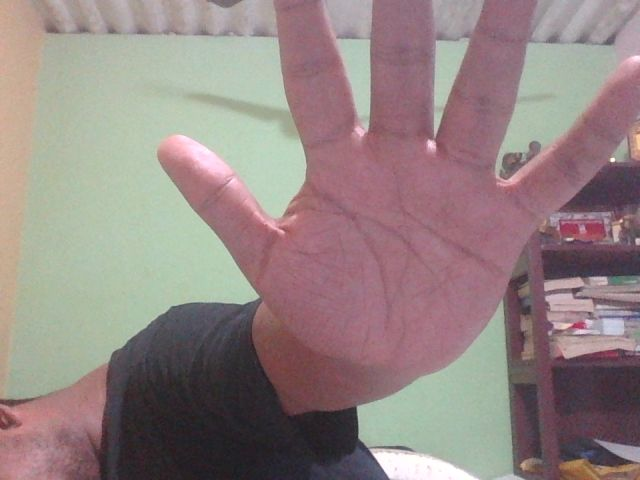

Predicted class: Paper
Predicted labels       : ['Paper', 'Rock', 'Scissors']
Predicted probabilities: [[0.60735196 0.01925634 0.3733917 ]]


In [29]:
# Define the classes
class_labels = ['Paper','Rock','Scissors']

# Define the function for taking a photo from webcam
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# Function to predict class label from an image array
def predict_class(image_array):
    image_array = np.expand_dims(image_array, axis=0)
    image_array /= 255.0  # Normalize pixel values

    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = class_labels[predicted_class_index]

    return predicted_class_label, predictions

try:
    # Take a photo using the webcam
    filename = take_photo()
    print('Saved to {}'.format(filename))

    # Load and preprocess the captured image
    img = image.load_img(filename, target_size=(300, 300))
    img_array = image.img_to_array(img)

    # Make predictions
    predicted_class_label, predictions = predict_class(img_array)

    # Display the captured image and prediction results
    display(Image(filename))
    print("Predicted class:", predicted_class_label)
    print("Predicted labels       :",class_labels )
    print("Predicted probabilities:", predictions )

except Exception as err:
    print(str(err))
